In [1]:
# Importing all Tools We Needed

# Regular EDA( Exploratory data analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,make_scorer
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest, f_classif


# Load the Data

In [3]:
df = pd.read_csv(r"F:\Heart_disease\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Let's find out how many each classes there
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

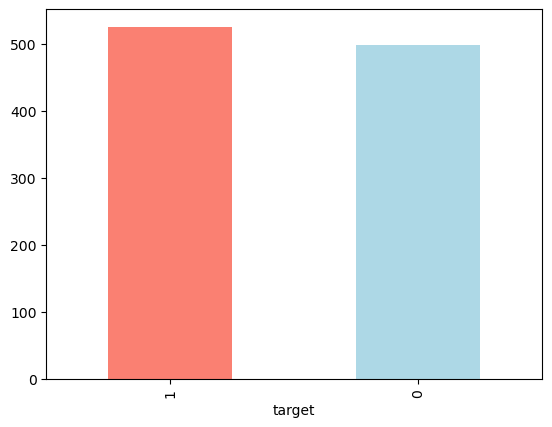

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()
plt.clf()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


<Figure size 640x480 with 0 Axes>

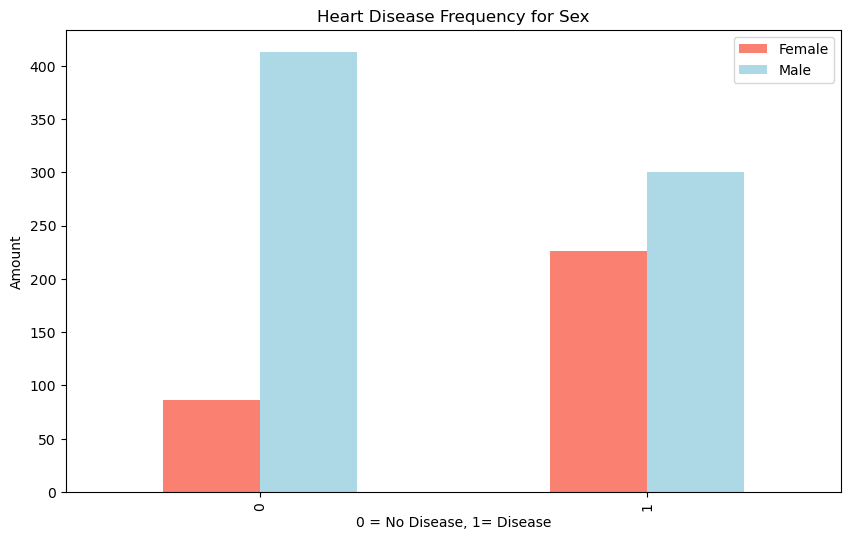

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
#plt.xticks()
plt.show()
plt.clf()


In [13]:
df["thalach"].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

## Age vs MAx Heart Rate for Heart Disease

<Figure size 640x480 with 0 Axes>

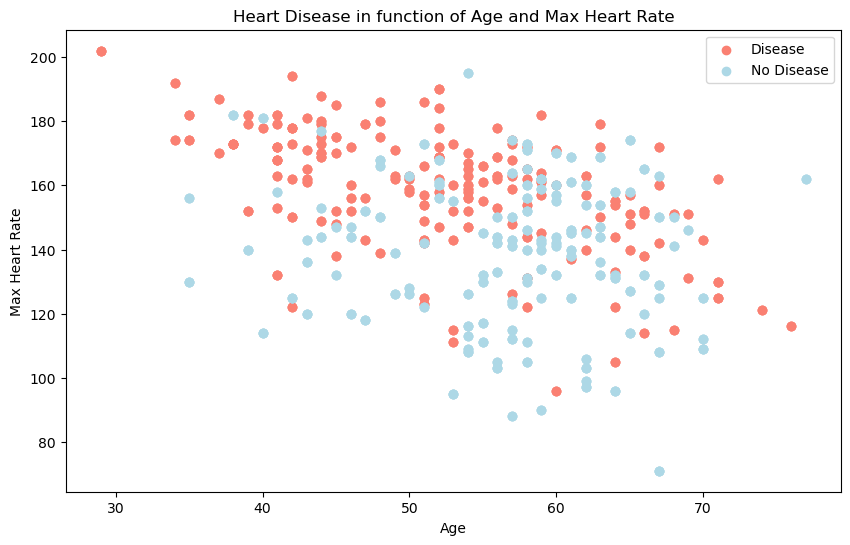

In [15]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Some helpful info

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()
plt.clf()

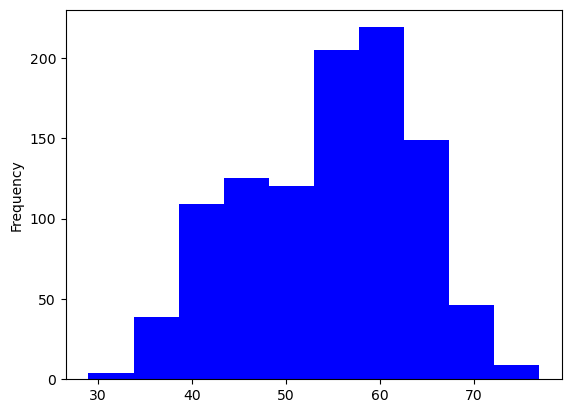

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(color='blue')
plt.show()

## Heart Disease Frequency per chest pain Type

> 3.cp - chest pain type

0: Typical angina:chest pain related decrease blood supply to the heart.

1:A typical angina: chest pain not related to heart.

2: Non-anginal pain: typically esophageal spams ( non heart related)

3: Asymptomatic: chest pain not showing signs of disease.



In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


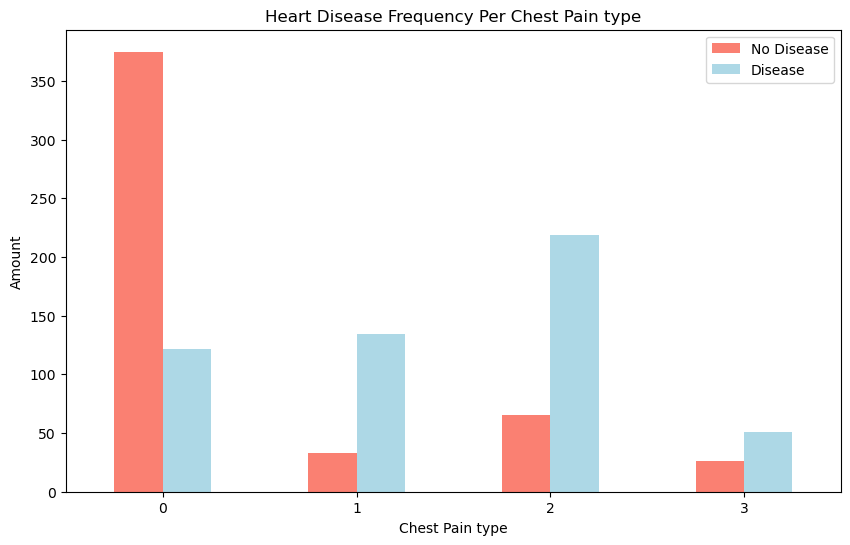

In [19]:
# Make crosstab more Visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);
plt.show()
plt.clf()

In [20]:
# Make Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Figure size 640x480 with 0 Axes>

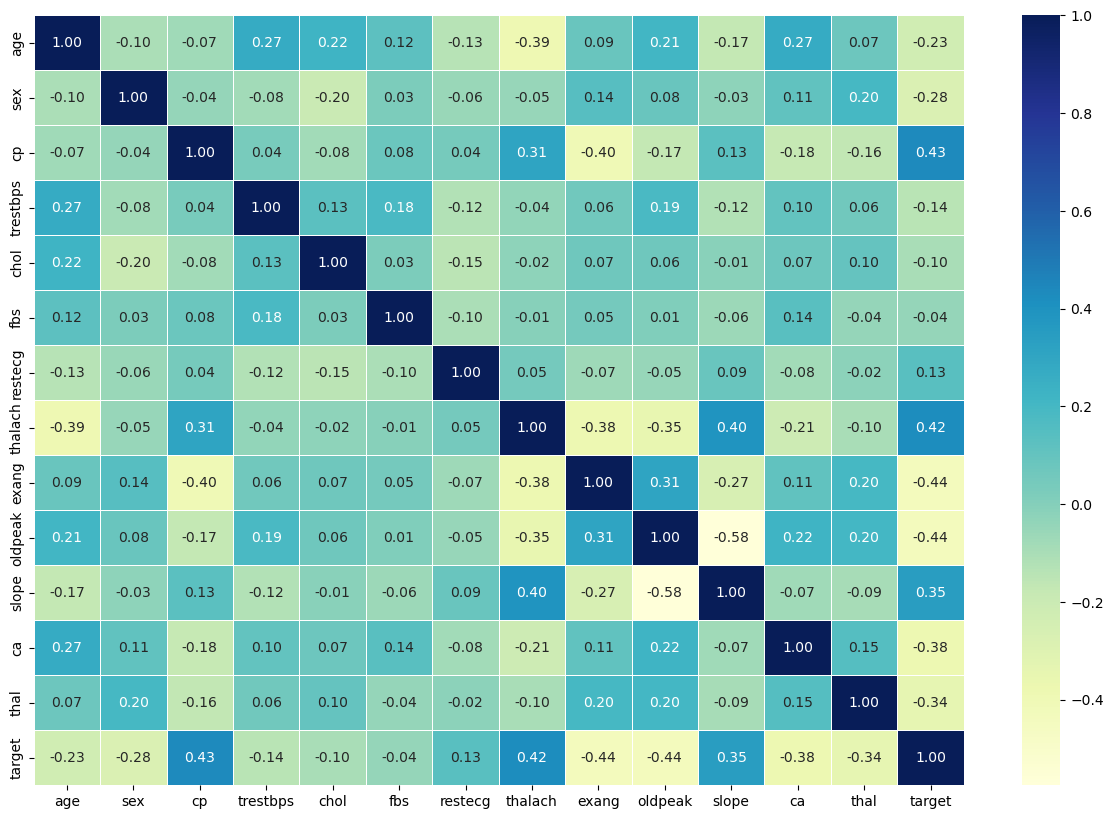

In [21]:
# Let's make our correlation matrix a little pettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.show()
plt.clf()


In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
# Split the data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

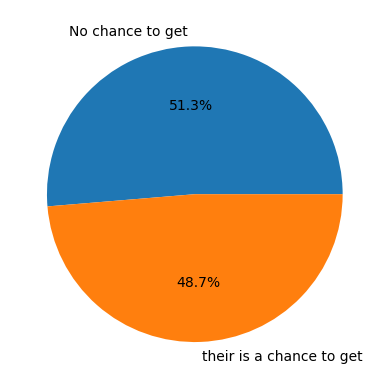

In [26]:
plt.pie(df['target'].value_counts(),labels=["No chance to get", "their is a chance to get"],autopct='%1.1f%%')
plt.show()

In [27]:
# Split the data into train and test
np.random.seed(42)

# Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [28]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [29]:
y_train, len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

In [30]:
# Importing and Loading the model
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()
bas_model = GaussianNB()
ada_model = AdaBoostClassifier()
grad_model = GradientBoostingClassifier()

In [31]:
# Lets fit the training model
lr_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
mlp_model.fit(x_train, y_train)
bas_model.fit(x_train, y_train)
ada_model.fit(x_train, y_train)
grad_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [32]:
#Using MLT results build the Voting Classifier (VC)
vc = VotingClassifier(estimators=[('lr', lr_model), ('dt', dt_model), ('rf', rf_model),
                                   ('knn', knn_model), ('svc', svc_model), ('mlp', mlp_model), ('bas',bas_model), ('ada',ada_model),('grad', grad_model)])

vc.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('mlp', MLPClassifier()), ('bas', GaussianNB()),
                             ('ada', AdaBoostClassifier()),
                             ('grad', GradientBoostingClassifier())])

In [33]:
qmbc_model = [lr_model, dt_model, rf_model, knn_model, svc_model, mlp_model,bas_model, ada_model, grad_model]

In [34]:
# Evaluate models and calculate accuracy, precision, recall, and f1-score
def evaluate_model(model, x_test, y_test):
    y_preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    return accuracy, precision, recall, f1
# Evaluate MLT models
mlt_models = [lr_model, dt_model, rf_model, knn_model, svc_model, mlp_model, bas_model, ada_model, grad_model, bas_model]
mlt_scores = {model.__class__.__name__: evaluate_model(model, x_test, y_test) for model in mlt_models}

In [35]:
# Evaluate VC and QMBC
vc_scores = evaluate_model(vc, x_test, y_test)
qmbc_scores = evaluate_model(vc, x_test, y_test)

In [36]:
# Display evaluation scores
print("MLT Model Scores:")
for model, scores in mlt_scores.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")

print("\nVoting Classifier Scores:")
print(f"Voting Classifier: Accuracy={vc_scores[0]:.4f}, Precision={vc_scores[1]:.4f}, Recall={vc_scores[2]:.4f}, F1={vc_scores[3]:.4f}")

print("\nQMBC Model Scores:")
print(f"QMBC Model: Accuracy={qmbc_scores[0]:.4f}, Precision={qmbc_scores[1]:.4f}, Recall={qmbc_scores[2]:.4f}, F1={qmbc_scores[3]:.4f}")

MLT Model Scores:
LogisticRegression: Accuracy=0.7854, Precision=0.7438, Recall=0.8738, F1=0.8036
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6829, Precision=0.6610, Recall=0.7573, F1=0.7059
MLPClassifier: Accuracy=0.7220, Precision=0.8194, Recall=0.5728, F1=0.6743
GaussianNB: Accuracy=0.8000, Precision=0.7541, Recall=0.8932, F1=0.8178
AdaBoostClassifier: Accuracy=0.8780, Precision=0.8900, Recall=0.8641, F1=0.8768
GradientBoostingClassifier: Accuracy=0.9317, Precision=0.9159, Recall=0.9515, F1=0.9333

Voting Classifier Scores:
Voting Classifier: Accuracy=0.8732, Precision=0.8532, Recall=0.9029, F1=0.8774

QMBC Model Scores:
QMBC Model: Accuracy=0.8732, Precision=0.8532, Recall=0.9029, F1=0.8774


In [37]:
# Make predictions for each individual model
lr_predictions = lr_model.predict(x_test)
dt_predictions = dt_model.predict(x_test)
rf_predictions = rf_model.predict(x_test)
knn_predictions = knn_model.predict(x_test)
svc_predictions = svc_model.predict(x_test)
mlp_predictions = mlp_model.predict(x_test)
gaussian_nb_predictions = bas_model.predict(x_test)
ada_predictions = ada_model.predict(x_test)
grad_predictions = grad_model.predict(x_test)

In [38]:
# Make predictions for the Voting Classifier
vc_predictions = vc.predict(x_test)

In [39]:
# Combine individual model predictions into a DataFrame
predictions_df = pd.DataFrame({
    "Logistic Regression": lr_predictions,
    "Decision Tree": dt_predictions,
    "Random Forest": rf_predictions,
    "KNeighbors": knn_predictions,
    "SVC": svc_predictions,
    "MLP": mlp_predictions,
    "GaussianNB": gaussian_nb_predictions,
    "AdaBoost": ada_predictions,
    "Gradient Boosting": grad_predictions,
    "Voting": vc_predictions  # Add predictions for the Voting Classifier
})

In [40]:
# Reset the index of predictions_df and y_test
predictions_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Initialize dictionaries to store correct and incorrect counts
correct_counts = {}
incorrect_counts = {}

# Compare individual model predictions with the predictions from the Voting Classifier
for column in predictions_df.columns:
    if column != "Voting":
        correct_predictions = (predictions_df[column] == y_test) & (predictions_df["Voting"] == y_test)
        incorrect_predictions = (predictions_df[column] != y_test) & (predictions_df["Voting"] == y_test)
        correct_count = correct_predictions.sum()
        incorrect_count = incorrect_predictions.sum()
        correct_counts[column] = correct_count
        incorrect_counts[column] = incorrect_count

# Display correct and incorrect counts
print("Correct Counts:")
for model, count in correct_counts.items():
    print(f"{model}: {count}")

print("\nIncorrect Counts:")
for model, count in incorrect_counts.items():
    print(f"{model}: {count}")

Correct Counts:
Logistic Regression: 158
Decision Tree: 179
Random Forest: 179
KNeighbors: 145
SVC: 135
MLP: 140
GaussianNB: 161
AdaBoost: 172
Gradient Boosting: 177

Incorrect Counts:
Logistic Regression: 21
Decision Tree: 0
Random Forest: 0
KNeighbors: 34
SVC: 44
MLP: 39
GaussianNB: 18
AdaBoost: 7
Gradient Boosting: 2


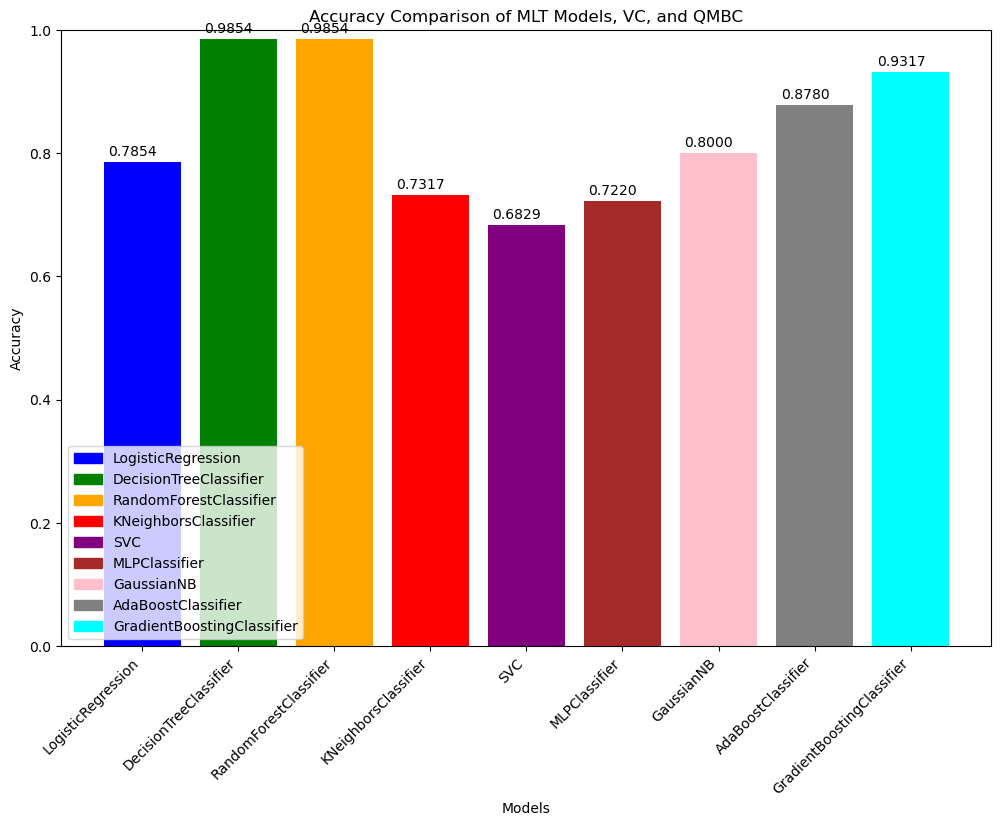

In [41]:
# Assuming you have a list of model names
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'SVC', 'MLPClassifier', 'GaussianNB', 'AdaBoostClassifier', 'GradientBoostingClassifier']

# Extracting accuracies from mlt_scores dictionary or defaulting to 0
accuracies = [mlt_scores.get(model, (0, 0, 0, 0))[0] for model in model_names]

# Define colors for each model
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plotting the bar graph with different colors
plt.figure(figsize=(12, 8))
bars = plt.bar(model_names, accuracies, color=colors[:len(model_names)])
plt.title('Accuracy Comparison of MLT Models, VC, and QMBC')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')

# Adding legend with model names and colors
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[i], edgecolor='none') for i in range(len(model_names))]
plt.legend(legend_labels, model_names)

# Adding accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.4f}', ha='center')

plt.show()


In [42]:
#Using the X_selected subset
x_train_selected, x_test_selected, y_train_selected, y_test_selected = train_test_split(x, y, test_size=0.2, random_state=42)

# Train MLT models on the selected features
lr_model_selected = LogisticRegression()
dt_model_selected = DecisionTreeClassifier()
rf_model_selected = RandomForestClassifier()
knn_model_selected = KNeighborsClassifier()
svc_model_selected = SVC()
mlp_model_selected = MLPClassifier()
grad_model_selected = GradientBoostingClassifier()
ada_model_selected = AdaBoostClassifier()
bas_model_selected = GaussianNB()

# Train models on the selected features
lr_model_selected.fit(x_train_selected, y_train_selected)
dt_model_selected.fit(x_train_selected, y_train_selected)
rf_model_selected.fit(x_train_selected, y_train_selected)
knn_model_selected.fit(x_train_selected, y_train_selected)
svc_model_selected.fit(x_train_selected, y_train_selected)
mlp_model_selected.fit(x_train_selected, y_train_selected)
grad_model_selected.fit(x_train_selected, y_train_selected)
ada_model_selected.fit(x_train_selected, y_train_selected)
bas_model_selected.fit(x_train_selected, y_train_selected)

# Evaluate models on the selected features
mlt_models_selected = [lr_model_selected, dt_model_selected, rf_model_selected, knn_model_selected, svc_model_selected, mlp_model_selected, grad_model_selected, ada_model_selected, bas_model_selected]
mlt_scores_selected = {model.__class__.__name__: evaluate_model(model, x_test_selected, y_test_selected) for model in mlt_models_selected}
# Display evaluation scores for selected features
print("\nMLT Model Scores on Selected Features:")
for model, scores in mlt_scores_selected.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")


MLT Model Scores on Selected Features:
LogisticRegression: Accuracy=0.7854, Precision=0.7438, Recall=0.8738, F1=0.8036
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6829, Precision=0.6610, Recall=0.7573, F1=0.7059
MLPClassifier: Accuracy=0.7756, Precision=0.7280, Recall=0.8835, F1=0.7982
GradientBoostingClassifier: Accuracy=0.9317, Precision=0.9159, Recall=0.9515, F1=0.9333
AdaBoostClassifier: Accuracy=0.8780, Precision=0.8900, Recall=0.8641, F1=0.8768
GaussianNB: Accuracy=0.8000, Precision=0.7541, Recall=0.8932, F1=0.8178


In [43]:
# Apply PCA to extract the best features from X_selected and create a super subset X_chi_selected using Algorithm 4
pca_selector = PCA(n_components='mle')  # You can adjust the parameters as needed
x_pca_selected = pca_selector.fit_transform(x)

# Use the super subset X_pca_selected
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca_selected, y, test_size=0.2, random_state=42)

# Train MLT models on the PCA features
lr_model_pca = LogisticRegression()
dt_model_pca = DecisionTreeClassifier()
rf_model_pca = RandomForestClassifier()
knn_model_pca = KNeighborsClassifier()
svc_model_pca = SVC()
mlp_model_pca = MLPClassifier()
bas_model_pca = GaussianNB()
grad_model_pca = GradientBoostingClassifier()
ada_model_pca = AdaBoostClassifier()

# Train models on the PCA features
lr_model_pca.fit(x_train_pca, y_train_pca)
dt_model_pca.fit(x_train_pca, y_train_pca)
rf_model_pca.fit(x_train_pca, y_train_pca)
knn_model_pca.fit(x_train_pca, y_train_pca)
svc_model_pca.fit(x_train_pca, y_train_pca)
mlp_model_pca.fit(x_train_pca, y_train_pca)
ada_model_pca.fit(x_train_pca, y_train_pca)
bas_model_pca.fit(x_train_pca, y_train_pca)
grad_model_pca.fit(x_train_pca, y_train_pca)

# Evaluate models on the PCA features
mlt_models_pca = [lr_model_pca, dt_model_pca, rf_model_pca, knn_model_pca, svc_model_pca, mlp_model_pca, bas_model_pca, grad_model_pca, ada_model_pca]
mlt_scores_pca = {model.__class__.__name__: evaluate_model(model, x_test_pca, y_test_pca) for model in mlt_models_pca}

# Display evaluation scores for PCA features
print("\nMLT Model Scores on PCA Features:")
for model, scores in mlt_scores_pca.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")



MLT Model Scores on PCA Features:
LogisticRegression: Accuracy=0.7951, Precision=0.7563, Recall=0.8738, F1=0.8108
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6537, Precision=0.6481, Recall=0.6796, F1=0.6635
MLPClassifier: Accuracy=0.8683, Precision=0.8393, Recall=0.9126, F1=0.8744
GaussianNB: Accuracy=0.7659, Precision=0.7434, Recall=0.8155, F1=0.7778
GradientBoostingClassifier: Accuracy=0.9707, Precision=0.9709, Recall=0.9709, F1=0.9709
AdaBoostClassifier: Accuracy=0.8390, Precision=0.8017, Recall=0.9029, F1=0.8493


In [44]:
# Apply PCA to extract the best features from X_selected and create a super subset X_chi_selected using Algorithm 4
pca_selector = PCA(n_components='mle')  # You can adjust the parameters as needed
x_pca_selected = pca_selector.fit_transform(x)

# Use the super subset X_pca_selected
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca_selected, y, test_size=0.2, random_state=42)

# Train MLT models on the PCA features
lr_model_pca = LogisticRegression()
dt_model_pca = DecisionTreeClassifier()
rf_model_pca = RandomForestClassifier()
knn_model_pca = KNeighborsClassifier()
svc_model_pca = SVC()
mlp_model_pca = MLPClassifier()
bas_model_pca = GaussianNB()
grad_model_pca = GradientBoostingClassifier()
ada_model_pca = AdaBoostClassifier()

# Train models on the PCA features
lr_model_pca.fit(x_train_pca, y_train_pca)
dt_model_pca.fit(x_train_pca, y_train_pca)
rf_model_pca.fit(x_train_pca, y_train_pca)
knn_model_pca.fit(x_train_pca, y_train_pca)
svc_model_pca.fit(x_train_pca, y_train_pca)
mlp_model_pca.fit(x_train_pca, y_train_pca)
ada_model_pca.fit(x_train_pca, y_train_pca)
bas_model_pca.fit(x_train_pca, y_train_pca)
grad_model_pca.fit(x_train_pca, y_train_pca)

# Evaluate models on the PCA features
mlt_models_pca = [lr_model_pca, dt_model_pca, rf_model_pca, knn_model_pca, svc_model_pca, mlp_model_pca, bas_model_pca, grad_model_pca, ada_model_pca]
mlt_scores_pca = {model.__class__.__name__: evaluate_model(model, x_test_pca, y_test_pca) for model in mlt_models_pca}

# Display evaluation scores for PCA features
print("\nMLT Model Scores on PCA Features:")
for model, scores in mlt_scores_pca.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")


MLT Model Scores on PCA Features:
LogisticRegression: Accuracy=0.7951, Precision=0.7563, Recall=0.8738, F1=0.8108
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6537, Precision=0.6481, Recall=0.6796, F1=0.6635
MLPClassifier: Accuracy=0.8829, Precision=0.8435, Recall=0.9417, F1=0.8899
GaussianNB: Accuracy=0.7659, Precision=0.7434, Recall=0.8155, F1=0.7778
GradientBoostingClassifier: Accuracy=0.9707, Precision=0.9709, Recall=0.9709, F1=0.9709
AdaBoostClassifier: Accuracy=0.8390, Precision=0.8017, Recall=0.9029, F1=0.8493


In [45]:
# Step 10: Apply Anova test for feature selection
anova_selector = SelectKBest(f_classif, k='all')
anvfeatures = anova_selector.fit_transform(x, y)

# Steps 11, 12, 13: Using Anvfeatures, repeat steps 3 to 5
# Step 11: Using the Anvfeatures subset, repeat steps 3 to 5
x_train_anova, x_test_anova, y_train_anova, y_test_anova = train_test_split(anvfeatures, y, test_size=0.2, random_state=42)

# Train MLT models on the Anova features
lr_model_anova = LogisticRegression()
dt_model_anova = DecisionTreeClassifier()
rf_model_anova = RandomForestClassifier()
knn_model_anova = KNeighborsClassifier()
svc_model_anova = SVC()
mlp_model_anova = MLPClassifier()
grad_model_anova = GradientBoostingClassifier()
ada_model_anova = AdaBoostClassifier()
bas_model_anova = GaussianNB()

# Train models on the Anova features
lr_model_anova.fit(x_train_anova, y_train_anova)
dt_model_anova.fit(x_train_anova, y_train_anova)
rf_model_anova.fit(x_train_anova, y_train_anova)
knn_model_anova.fit(x_train_anova, y_train_anova)
svc_model_anova.fit(x_train_anova, y_train_anova)
mlp_model_anova.fit(x_train_anova, y_train_anova)
grad_model_anova.fit(x_train_anova, y_train_anova)
ada_model_anova.fit(x_train_anova, y_train_anova)
bas_model_anova.fit(x_train_anova, y_train_anova)

# Evaluate models on the Anova features
mlt_models_anova = [lr_model_anova, dt_model_anova, rf_model_anova, knn_model_anova, svc_model_anova, mlp_model_anova, grad_model_anova, ada_model_anova, bas_model_anova]
mlt_scores_anova = {model.__class__.__name__: evaluate_model(model, x_test_anova, y_test_anova) for model in mlt_models_anova}

# Display evaluation scores for Anova features
print("\nMLT Model Scores on Anova Features:")
for model, scores in mlt_scores_anova.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")


MLT Model Scores on Anova Features:
LogisticRegression: Accuracy=0.7854, Precision=0.7438, Recall=0.8738, F1=0.8036
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6829, Precision=0.6610, Recall=0.7573, F1=0.7059
MLPClassifier: Accuracy=0.7707, Precision=0.7154, Recall=0.9029, F1=0.7983
GradientBoostingClassifier: Accuracy=0.9317, Precision=0.9159, Recall=0.9515, F1=0.9333
AdaBoostClassifier: Accuracy=0.8780, Precision=0.8900, Recall=0.8641, F1=0.8768
GaussianNB: Accuracy=0.8000, Precision=0.7541, Recall=0.8932, F1=0.8178


In [46]:
# Use Anvfeatures to extract the best features by applying PCA Algorithm 4 and create a super subset AnvPcaSelected
pca_selector_anova = PCA(n_components='mle')  # You can adjust the parameters as needed
x_pca_anova_selected = pca_selector_anova.fit_transform(anvfeatures)

# Step 13: Use AnvPcaSelected and repeat steps 3 to 5
x_train_pca_anova, x_test_pca_anova, y_train_pca_anova, y_test_pca_anova = train_test_split(x_pca_anova_selected, y, test_size=0.2, random_state=42)

# Train MLT models on the PCA Anova features
lr_model_pca_anova = LogisticRegression()
dt_model_pca_anova = DecisionTreeClassifier()
rf_model_pca_anova = RandomForestClassifier()
knn_model_pca_anova = KNeighborsClassifier()
svc_model_pca_anova = SVC()
mlp_model_pca_anova = MLPClassifier()
grad_model_pca_anova = GradientBoostingClassifier()
ada_model_pca_anova = AdaBoostClassifier()
bas_model_pca_anova = GaussianNB()

# Train models on the PCA Anova features
lr_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
dt_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
rf_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
knn_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
svc_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
mlp_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
grad_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
ada_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)
bas_model_pca_anova.fit(x_train_pca_anova, y_train_pca_anova)

# Evaluate models on the PCA Anova features
mlt_models_pca_anova = [lr_model_pca_anova, dt_model_pca_anova, rf_model_pca_anova, knn_model_pca_anova, svc_model_pca_anova, mlp_model_pca_anova, grad_model_pca_anova, ada_model_pca_anova, bas_model_pca_anova]
mlt_scores_pca_anova = {model.__class__.__name__: evaluate_model(model, x_test_pca_anova, y_test_pca_anova) for model in mlt_models_pca_anova}

# Display evaluation scores for PCA Anova features
print("\nMLT Model Scores on PCA Anova Features:")
for model, scores in mlt_scores_pca_anova.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")


MLT Model Scores on PCA Anova Features:
LogisticRegression: Accuracy=0.7951, Precision=0.7563, Recall=0.8738, F1=0.8108
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6537, Precision=0.6481, Recall=0.6796, F1=0.6635
MLPClassifier: Accuracy=0.8537, Precision=0.8120, Recall=0.9223, F1=0.8636
GradientBoostingClassifier: Accuracy=0.9707, Precision=0.9709, Recall=0.9709, F1=0.9709
AdaBoostClassifier: Accuracy=0.8390, Precision=0.8017, Recall=0.9029, F1=0.8493
GaussianNB: Accuracy=0.7659, Precision=0.7434, Recall=0.8155, F1=0.7778


In [47]:
# Compare models and identify the best model
# Display a final comparison of all model scores
all_model_scores = {
    "MLT Models": dict(mlt_scores),
    "MLT Models on Selected Features": dict(mlt_scores_selected),
    "MLT Models on PCA Features": dict(mlt_scores_pca),
    "MLT Models on Anova Features": dict(mlt_scores_anova),
    "MLT Models on PCA Anova Features": dict(mlt_scores_pca_anova),
    "Voting Classifier": {"Voting Classifier": vc_scores[0]},  # Assuming vc_scores is a tuple
    "QMBC Model": {"QMBC Model": qmbc_scores[0]}  # Assuming qmbc_scores is a tuple
}

# Display final comparison
print("\nFinal Model Comparison:")
for model_group, scores in all_model_scores.items():
    print(f"\n{model_group}")
    for model, metrics in scores.items():
        if isinstance(metrics, tuple):
            print(f"{model}: Accuracy={metrics[0]:.4f}, Precision={metrics[1]:.4f}, Recall={metrics[2]:.4f}, F1={metrics[3]:.4f}")
        else:
            print(f"{model}: Accuracy={metrics:.4f}")



Final Model Comparison:

MLT Models
LogisticRegression: Accuracy=0.7854, Precision=0.7438, Recall=0.8738, F1=0.8036
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
KNeighborsClassifier: Accuracy=0.7317, Precision=0.7308, Recall=0.7379, F1=0.7343
SVC: Accuracy=0.6829, Precision=0.6610, Recall=0.7573, F1=0.7059
MLPClassifier: Accuracy=0.7220, Precision=0.8194, Recall=0.5728, F1=0.6743
GaussianNB: Accuracy=0.8000, Precision=0.7541, Recall=0.8932, F1=0.8178
AdaBoostClassifier: Accuracy=0.8780, Precision=0.8900, Recall=0.8641, F1=0.8768
GradientBoostingClassifier: Accuracy=0.9317, Precision=0.9159, Recall=0.9515, F1=0.9333

MLT Models on Selected Features
LogisticRegression: Accuracy=0.7854, Precision=0.7438, Recall=0.8738, F1=0.8036
DecisionTreeClassifier: Accuracy=0.9854, Precision=1.0000, Recall=0.9709, F1=0.9852
RandomForestClassifier: Accuracy=0.9854, Precision=1.000

# HyperParameter Tuning

## 1. GridSearchCV


In [49]:
# Create a new Random Forest Classifier
rf_model = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

# Create F1 scorer for scoring parameter
scorer = make_scorer(accuracy_score)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_rf_grid = grid_search_rf.best_params_
best_model_rf_grid = grid_search_rf.best_estimator_

print("Best Hyperparameters (GridSearchCV - RandomForest):", best_params_rf_grid)


Best Hyperparameters (GridSearchCV - RandomForest): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [50]:
# Create a new AdaBoost Classifier
ada_model = AdaBoostClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_adaboost = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0, 2.0]
}

# Create GridSearchCV object
grid_search_adaboost = GridSearchCV(ada_model, param_grid=param_grid_adaboost, cv=5)

# Fit the model
grid_search_adaboost.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_adaboost_grid = grid_search_adaboost.best_params_
best_model_adaboost_grid = grid_search_adaboost.best_estimator_

print("Best Hyperparameters (GridSearchCV - AdaBoost):", best_params_adaboost_grid)


Best Hyperparameters (GridSearchCV - AdaBoost): {'learning_rate': 1.0, 'n_estimators': 150}


In [51]:
# Create a new Gradient Boosting Classifier
grad_model = GradientBoostingClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_gradient = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

# Create GridSearchCV object
grid_search_gradient = GridSearchCV(grad_model, param_grid=param_grid_gradient, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search_gradient.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_gradient_grid = grid_search_gradient.best_params_
best_model_gradient_grid = grid_search_gradient.best_estimator_

print("Best Hyperparameters (GridSearchCV - GradientBoosting):", best_params_gradient_grid)


Best Hyperparameters (GridSearchCV - GradientBoosting): {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


In [52]:
# Create a new Logistic Regression model
logistic_model = LogisticRegression()

# Define the hyperparameter grid for GridSearchCV
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create GridSearchCV object
grid_search_logistic = GridSearchCV(logistic_model, param_grid=param_grid_logistic, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search_logistic.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_logistic_grid = grid_search_logistic.best_params_
best_model_logistic_grid = grid_search_logistic.best_estimator_

print("Best Hyperparameters (GridSearchCV - Logistic Regression):", best_params_logistic_grid)


Best Hyperparameters (GridSearchCV - Logistic Regression): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:
# Create a new K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create GridSearchCV object
grid_search_knn = GridSearchCV(knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1)

# Fit the model
grid_search_knn.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_knn_grid = grid_search_knn.best_params_
best_model_knn_grid = grid_search_knn.best_estimator_

print("Best Hyperparameters (GridSearchCV - K-Nearest Neighbors):", best_params_knn_grid)


Best Hyperparameters (GridSearchCV - K-Nearest Neighbors): {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [54]:
# Create a new Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_dt = GridSearchCV(dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1)

# Fit the model
grid_search_dt.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_dt_grid = grid_search_dt.best_params_
best_model_dt_grid = grid_search_dt.best_estimator_

print("Best Hyperparameters (GridSearchCV - Decision Tree):", best_params_dt_grid)


Best Hyperparameters (GridSearchCV - Decision Tree): {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [55]:
# Create a new MLP model
mlp_model = MLPClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50, 50), (100,), (100, 50, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create GridSearchCV object
grid_search_mlp = GridSearchCV(mlp_model, param_grid=param_grid_mlp, cv=5, n_jobs=-1)

# Fit the model
grid_search_mlp.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_mlp_grid = grid_search_mlp.best_params_
best_model_mlp_grid = grid_search_mlp.best_estimator_

print("Best Hyperparameters (GridSearchCV - MLP):", best_params_mlp_grid)


Best Hyperparameters (GridSearchCV - MLP): {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 100), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [56]:
# Create a new SVC model
#svc_model = SVC()

# Define the hyperparameter grid for GridSearchCV
#param_grid_svc = {
 #   'C': [0.1, 1, 10, 100],
  #  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   # 'gamma': ['scale', 'auto']
#}

# Create GridSearchCV object
#grid_search_svc = GridSearchCV(svc_model, param_grid=param_grid_svc, cv=5, n_jobs=-1)

# Fit the model
#grid_search_svc.fit(x_train, y_train)

# Get the best parameters and the best model
#best_params_svc_grid = grid_search_svc.best_params_
#best_model_svc_grid = grid_search_svc.best_estimator_

#print("Best Hyperparameters (GridSearchCV - SVC):", best_params_svc_grid)

## 2. RandomizedSearchCV

In [58]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create F1 scorer for scoring parameter
scorer = make_scorer(f1_score)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, scoring=scorer, cv=5, n_iter=10, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model_random = random_search.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV):", best_params)

# Now you can use the best_model_random for predictions and evaluation


Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [59]:
# Create an AdaBoost Classifier
adaboost_model = AdaBoostClassifier()

# Define the hyperparameter grid
param_dist_adaboost = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0, 2.0]
}

# Create RandomizedSearchCV object
random_search_adaboost = RandomizedSearchCV(
    adaboost_model, param_distributions=param_dist_adaboost, cv=5, n_iter=10, random_state=42
)

# Fit the model
random_search_adaboost.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_adaboost_random = random_search_adaboost.best_params_
best_model_adaboost_random = random_search_adaboost.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV - AdaBoost):", best_params_adaboost_random)


Best Hyperparameters (RandomizedSearchCV - AdaBoost): {'n_estimators': 200, 'learning_rate': 1.0}


In [60]:
# Create a Gradient Boosting Classifier
grad_model = GradientBoostingClassifier()

# Define the hyperparameter grid
param_dist_gradient = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create F1 scorer for scoring parameter
scorer = make_scorer(f1_score)

# Create RandomizedSearchCV object
random_search_gradient = RandomizedSearchCV(
    grad_model, param_distributions=param_dist_gradient, scoring=scorer, cv=5, n_iter=10, random_state=42, n_jobs=-1
)

# Fit the model
random_search_gradient.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_gradient_random = random_search_gradient.best_params_
best_model_gradient_random = random_search_gradient.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV - GradientBoosting):", best_params_gradient_random)


Best Hyperparameters (RandomizedSearchCV - GradientBoosting): {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.2}


In [61]:
# Create a Logistic Regression model
lr_model = LogisticRegression()

# Define the hyperparameter grid
param_dist_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create F1 scorer for scoring parameter
scorer = make_scorer(f1_score)

# Create RandomizedSearchCV object
random_search_logistic = RandomizedSearchCV(
    lr_model, param_distributions=param_dist_logistic, scoring=scorer, cv=5, n_iter=10, random_state=42, n_jobs=-1
)

# Fit the model
random_search_logistic.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_logistic_random = random_search_logistic.best_params_
best_model_logistic_random = random_search_logistic.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV - Logistic Regression):", best_params_logistic_random)


Best Hyperparameters (RandomizedSearchCV - Logistic Regression): {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}


In [62]:
# Create a K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(
    knn_model, param_distributions=param_dist_knn, cv=5, n_iter=10, random_state=42, n_jobs=-1
)

# Fit the model
random_search_knn.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_knn_random = random_search_knn.best_params_
best_model_knn_random = random_search_knn.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV - K-Nearest Neighbors):", best_params_knn_random)


Best Hyperparameters (RandomizedSearchCV - K-Nearest Neighbors): {'weights': 'distance', 'p': 1, 'n_neighbors': 11}


In [63]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(
    dt_model, param_distributions=param_dist_dt, cv=5, n_iter=10, random_state=42, n_jobs=-1
)

# Fit the model
random_search_dt.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_dt_random = random_search_dt.best_params_
best_model_dt_random = random_search_dt.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV - Decision Tree):", best_params_dt_random)


Best Hyperparameters (RandomizedSearchCV - Decision Tree): {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'entropy'}


In [64]:
# Create an MLP model
mlp_model = MLPClassifier()

# Define the hyperparameter grid
param_dist_mlp = {
    'hidden_layer_sizes': [(50, 50, 50), (100,), (100, 50, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create RandomizedSearchCV object
random_search_mlp = RandomizedSearchCV(
    mlp_model, param_distributions=param_dist_mlp, cv=5, n_iter=10, random_state=42, n_jobs=-1
)

# Fit the model
random_search_mlp.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_mlp_random = random_search_mlp.best_params_
best_model_mlp_random = random_search_mlp.best_estimator_

print("Best Hyperparameters (RandomizedSearchCV - MLP):", best_params_mlp_random)

Best Hyperparameters (RandomizedSearchCV - MLP): {'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.1, 'activation': 'relu'}


In [65]:
# Create an SVC model
#svc_model = SVC()
# Define the hyperparameter grid
#param_dist_svc = {
 #   'C': [0.1, 1, 10, 100],
  #  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   # 'gamma': ['scale', 'auto']
#}

# Create RandomizedSearchCV object
#random_search_svc = RandomizedSearchCV(
 #   svc_model, param_distributions=param_dist_svc, cv=5, n_iter=10, random_state=42, n_jobs=-1
#)

# Fit the model
#random_search_svc.fit(x_train, y_train)

# Get the best parameters and the best model
#best_params_svc_random = random_search_svc.best_params_
#best_model_svc_random = random_search_svc.best_estimator_

#print("Best Hyperparameters (RandomizedSearchCV - SVC):", best_params_svc_random)

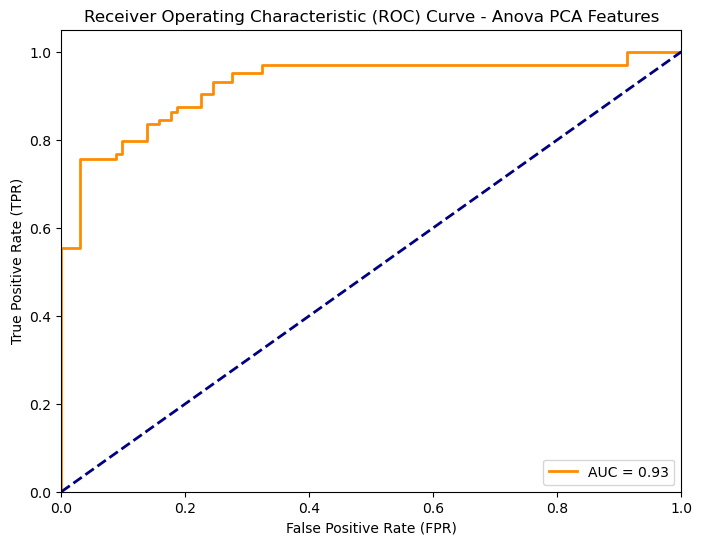

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on Anova PCA features
y_prob_anova_pca = ada_model_pca_anova.predict_proba(x_test_pca_anova)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_pca_anova, y_prob_anova_pca)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Anova PCA Features')
plt.legend(loc='lower right')
plt.show()
plt.clf()

## 4. Confusion Matrix

In [68]:
# Make predictions with the best model
y_preds = best_model_adaboost_random.predict(x_test)

# Display classification report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       102
           1       0.94      0.88      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [69]:
# List of MLT models on Anova PCA features
#mlt_models_pca_anova = [lr_model_pca_anova, dt_model_pca_anova, rf_model_pca_anova, knn_model_pca_anova, svc_model_pca_anova, mlp_model_pca_anova, ada_model_pca_anova, bas_model_pca_anova, grad_model_pca_anova]

# Loop through each model
#for model in mlt_models_pca_anova:
    # Predict binary labels on Anova PCA features
    #y_pred = model.predict(x_test_pca_anova)

    # Create a confusion matrix
    #conf_matrix = confusion_matrix(y_test_pca_anova, y_pred)

    # Plot the confusion matrix
    #plt.figure(figsize=(8, 6))
    #sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    #plt.title(f'Confusion Matrix - {model.__class__.__name__} on Anova PCA Features')
    #plt.xlabel('Predicted Labels')
    #plt.ylabel('True Labels')
    #plt.show()


Classification Report - LogisticRegression on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



<Figure size 640x480 with 0 Axes>

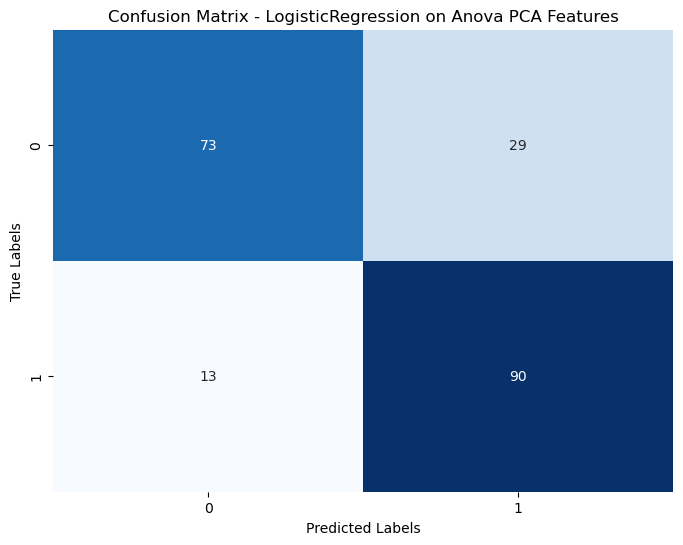

Classification Report - DecisionTreeClassifier on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<Figure size 640x480 with 0 Axes>

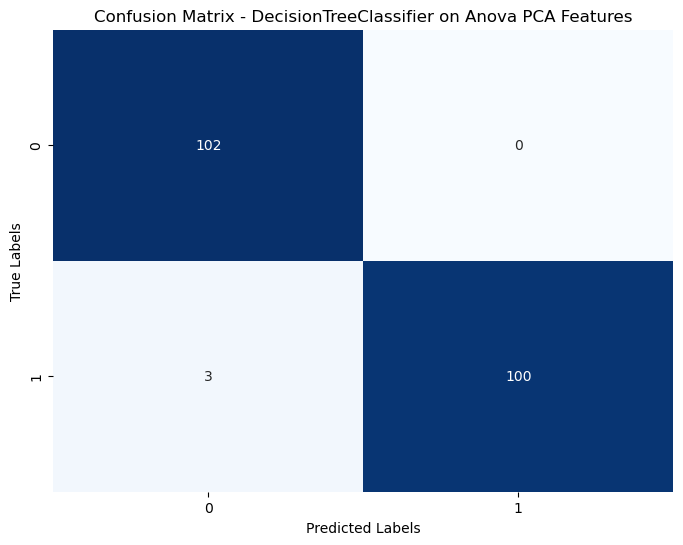

Classification Report - RandomForestClassifier on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<Figure size 640x480 with 0 Axes>

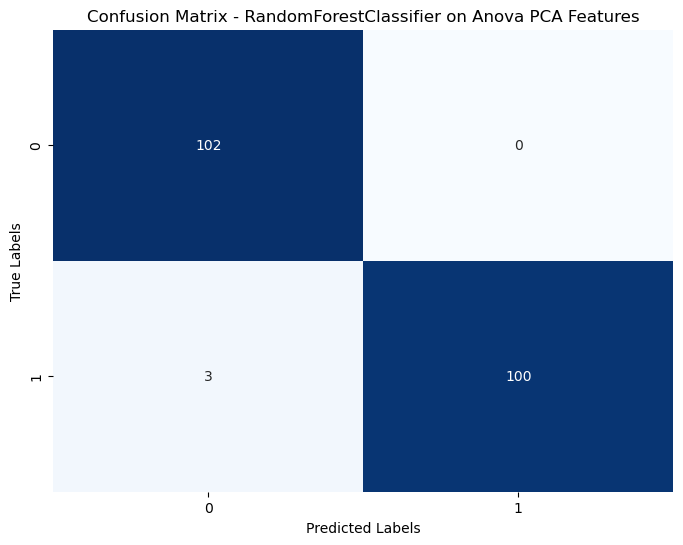

Classification Report - KNeighborsClassifier on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



<Figure size 640x480 with 0 Axes>

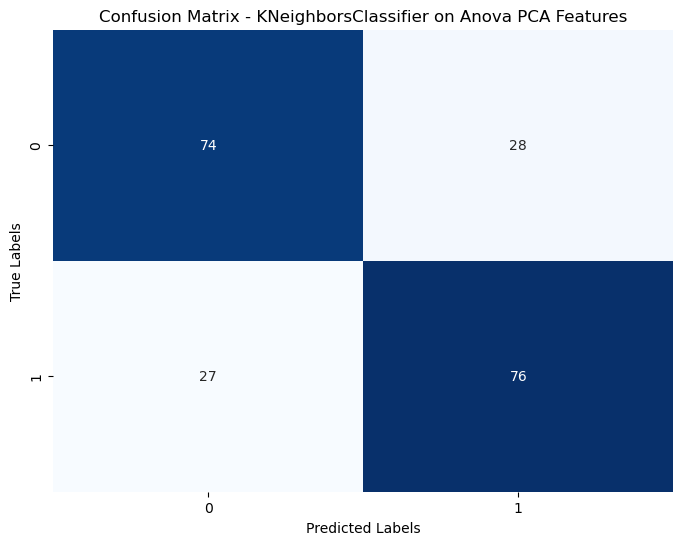

Classification Report - SVC on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       102
           1       0.65      0.68      0.66       103

    accuracy                           0.65       205
   macro avg       0.65      0.65      0.65       205
weighted avg       0.65      0.65      0.65       205



<Figure size 640x480 with 0 Axes>

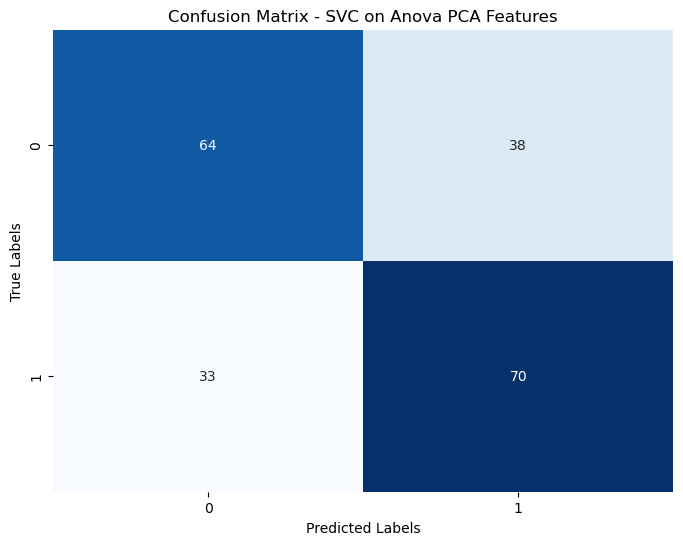

Classification Report - MLPClassifier on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       102
           1       0.81      0.92      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



<Figure size 640x480 with 0 Axes>

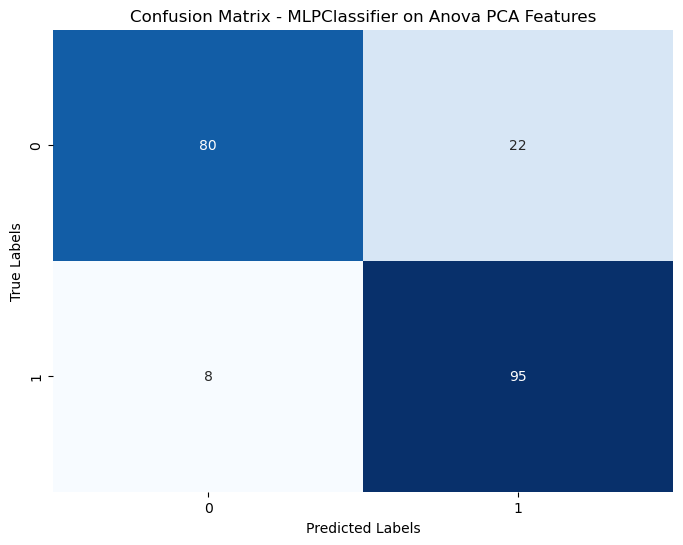

Classification Report - AdaBoostClassifier on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       102
           1       0.80      0.90      0.85       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



<Figure size 640x480 with 0 Axes>

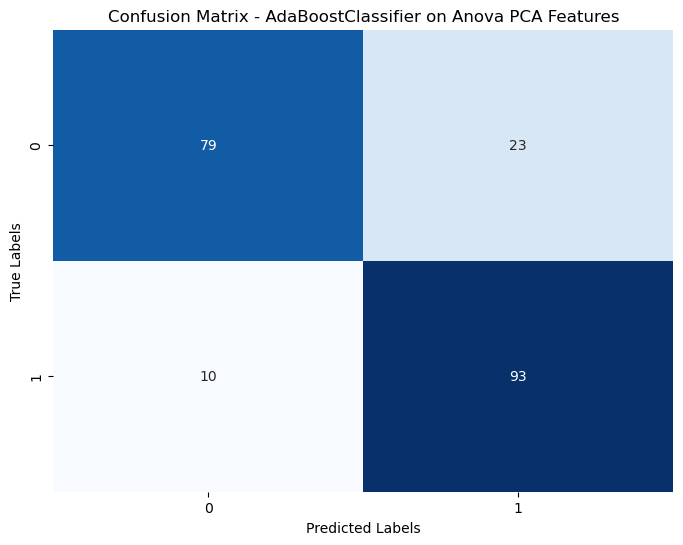

Classification Report - GaussianNB on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       102
           1       0.74      0.82      0.78       103

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.77      0.77      0.77       205



<Figure size 640x480 with 0 Axes>

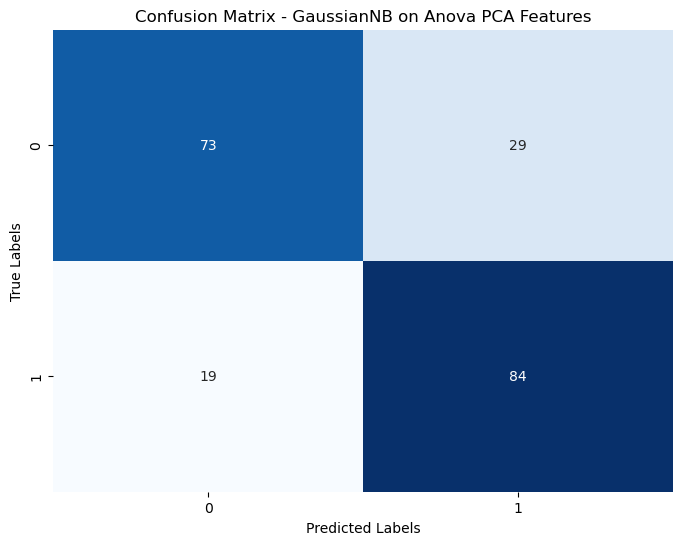

Classification Report - GradientBoostingClassifier on Anova PCA Features:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.97      0.97      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



<Figure size 640x480 with 0 Axes>

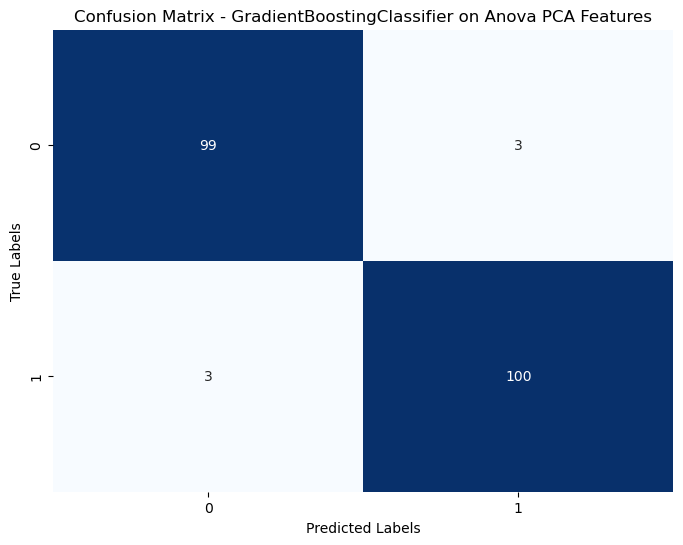

In [70]:
from sklearn.metrics import classification_report

# List of MLT models on Anova PCA features
mlt_models_pca_anova = [lr_model_pca_anova, dt_model_pca_anova, rf_model_pca_anova, knn_model_pca_anova, svc_model_pca_anova, mlp_model_pca_anova, ada_model_pca_anova, bas_model_pca_anova, grad_model_pca_anova]

# Loop through each model
for model in mlt_models_pca_anova:
    # Predict binary labels on Anova PCA features
    y_pred = model.predict(x_test_pca_anova)

    # Print classification report
    print(f'Classification Report - {model.__class__.__name__} on Anova PCA Features:')
    print(classification_report(y_test_pca_anova, y_pred))

    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test_pca_anova, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model.__class__.__name__} on Anova PCA Features')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    plt.clf()


<Figure size 640x480 with 0 Axes>

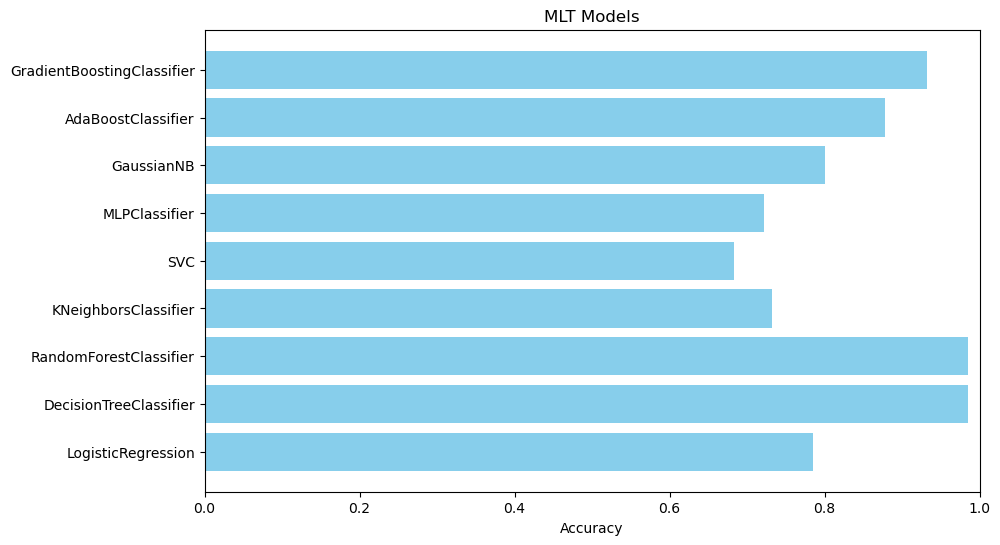

<Figure size 640x480 with 0 Axes>

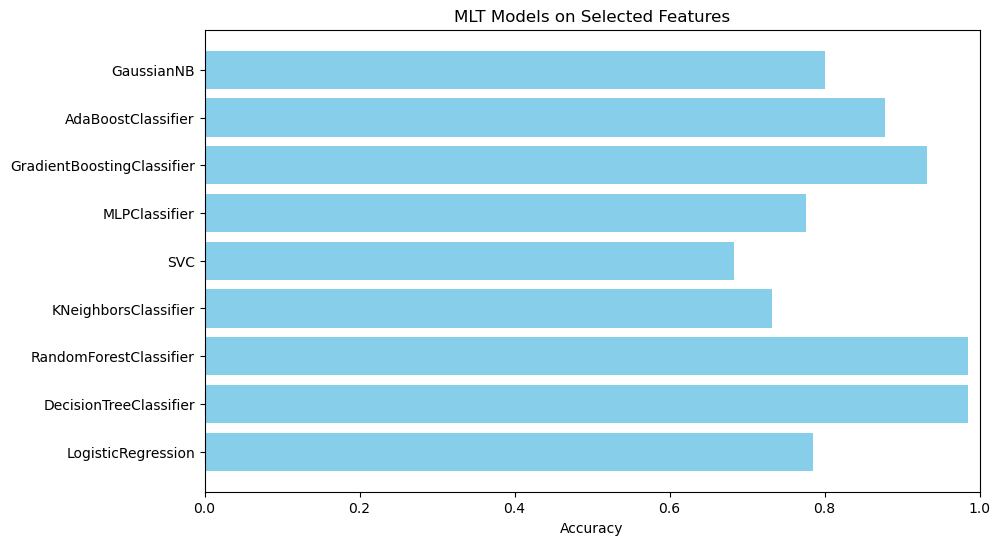

<Figure size 640x480 with 0 Axes>

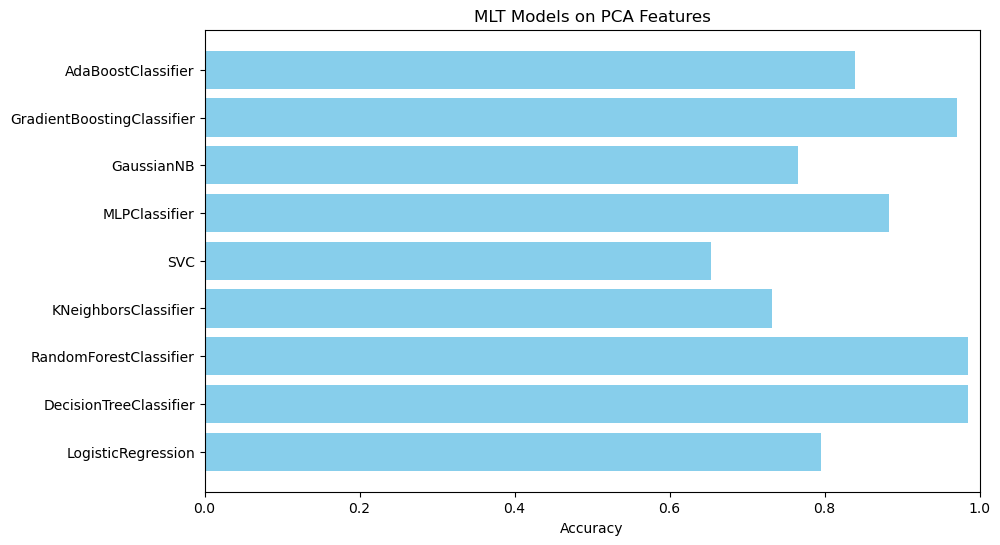

<Figure size 640x480 with 0 Axes>

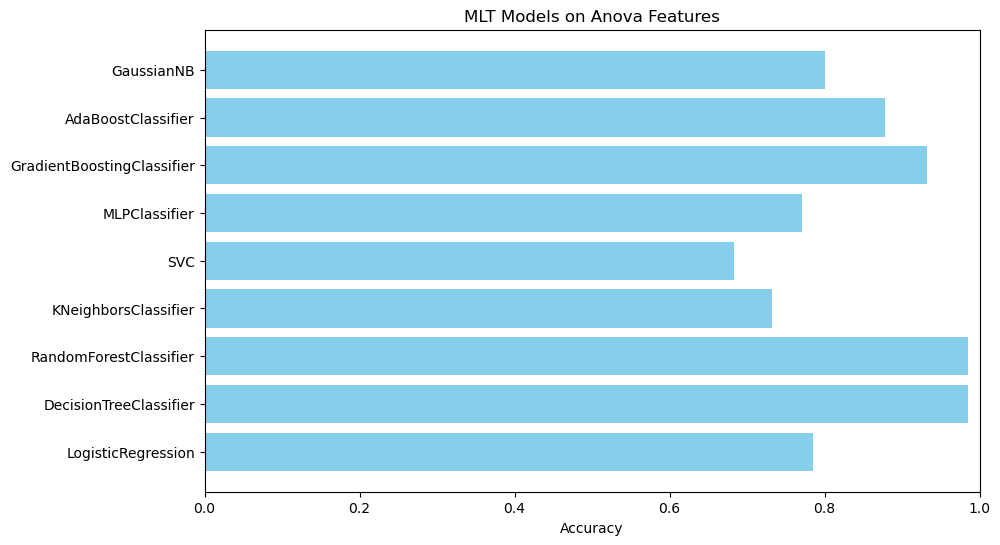

In [71]:
# Assuming you have mlt_scores, mlt_scores_selected, mlt_scores_pca, and mlt_scores_anova as dictionaries
# where keys are model names and values are tuples of (accuracy, precision, recall, f1)

def plot_model_comparison(model_scores, title):
    models = list(model_scores.keys())
    accuracies = [score[0] for score in model_scores.values()]

    plt.figure(figsize=(10, 6))
    plt.barh(models, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title(title)
    plt.xlim(0, 1.0)
    plt.show()
    plt.clf()

# Plot comparison for MLT models
plot_model_comparison(dict(mlt_scores), 'MLT Models')

# Plot comparison for MLT models on selected features
plot_model_comparison(dict(mlt_scores_selected), 'MLT Models on Selected Features')

# Plot comparison for MLT models on PCA features
plot_model_comparison(dict(mlt_scores_pca), 'MLT Models on PCA Features')

# Plot comparison for MLT models on Anova features
plot_model_comparison(dict(mlt_scores_anova), 'MLT Models on Anova Features')


## Feature Importance

> Feature Importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?

> Finding Feature Importance is different for each machine learning model. One way to find feature importance is to search for( MODEL NAME) feature importnace.


In [73]:
#Let's find the feature importance for our LogisticRegression model
# Fit the instance of LogisticRegression
lr_model = LogisticRegression(C = 0.20433597178569418,
                        solver="liblinear")
lr_model.fit(x_train, y_train);

In [74]:
# Check Coeff
lr_model.coef_

array([[ 0.01575013, -1.26513654,  0.7753483 , -0.01372304, -0.00699631,
        -0.14437776,  0.28403669,  0.03492841, -0.64220174, -0.62257045,
         0.46428683, -0.75326437, -0.91923673]])

In [75]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(lr_model.coef_[0])))
feature_dict

{'age': 0.015750128941437656,
 'sex': -1.265136536391288,
 'cp': 0.7753482990300707,
 'trestbps': -0.013723039200290612,
 'chol': -0.00699631177553557,
 'fbs': -0.14437776253211332,
 'restecg': 0.28403668651599423,
 'thalach': 0.03492841120401825,
 'exang': -0.6422017405871958,
 'oldpeak': -0.622570453374822,
 'slope': 0.46428682695333945,
 'ca': -0.7532643662817492,
 'thal': -0.9192367349858738}

In [76]:
# Visualize feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Performance Monitoring:

In [78]:
import logging

# Configure logging to output to both console and file
logging.basicConfig(filename='model_logs.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')
console = logging.StreamHandler()
console.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console.setFormatter(formatter)
logging.getLogger('').addHandler(console)

# Function to log performance metrics
def log_performance_metrics(model_name, metrics):
    logging.info(f"{model_name}: {', '.join([f'{metric}={value}' for metric, value in metrics.items()])}")

# Example usage
metrics = {"Accuracy": 0.9854, "Precision": 1.0000, "Recall": 0.9709, "F1": 0.9852}
log_performance_metrics("Random Forest", metrics)
print('Hi!')

2025-02-24 23:06:28,166 - INFO - Random Forest: Accuracy=0.9854, Precision=1.0, Recall=0.9709, F1=0.9852


Hi!


# Model Drift Detection:

In [80]:
import numpy as np

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    # Calculate accuracy, precision, recall, and F1 score
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

# Function to detect model drift
def detect_model_drift(previous_metrics, current_metrics, threshold=0.05):
    # Compare current and previous metrics
    drift_detected = False
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
        if abs(current_metrics[metric] - previous_metrics[metric]) > threshold:
            drift_detected = True
            break
    return drift_detected

# Example usage
# Assume previous_metrics and current_metrics are dictionaries containing performance metrics
previous_metrics = {'Accuracy': 0.90, 'Precision': 0.85, 'Recall': 0.95, 'F1': 0.90}
current_metrics = {'Accuracy': 0.85, 'Precision': 0.80, 'Recall': 0.90, 'F1': 0.85}

# Calculate model drift
drift_detected = detect_model_drift(previous_metrics, current_metrics)

if drift_detected:
    print("Model drift detected!")
else:
    print("No model drift detected.")


Model drift detected!


# Periodic Retraining:

In [82]:
# Function to check if retraining is needed
def check_retraining_needed(current_metrics, previous_metrics, retraining_interval=30):
    if current_metrics['iteration'] - previous_metrics['iteration'] >= retraining_interval:
        return True
    else:
        return False

# Define current and previous metrics
current_metrics = {'iteration': 100, 'Accuracy': 0.9854, 'Precision': 1.0, 'Recall': 0.9709, 'F1': 0.9852}
previous_metrics = {'iteration': 70, 'Accuracy': 0.9842, 'Precision': 1.0, 'Recall': 0.9721, 'F1': 0.9858}

# Define the retraining interval
retraining_interval = 30

# Check if retraining is needed
retraining_needed = check_retraining_needed(current_metrics, previous_metrics, retraining_interval)

# Print the result
if retraining_needed:
    print("Retraining is needed.")
else:
    print("Retraining is not needed.")


Retraining is needed.


# Model Updates:

In [84]:
import datetime

class ModelUpdater:
    def __init__(self, model):
        self.model = model
    
    def update_model(self, new_data):
        # Train the model with new data
        self.model.fit(new_data['X_train'], new_data['y_train'])
        
        # Update model version or any other relevant information
        self.model.version += 1
        self.model.last_updated = datetime.datetime.now()
        
        print("Model updated successfully.")
# Initialize the model updater
#updater = ModelUpdater(my_model)

# Update the model with new data
#updater.update_model(new_data)